# Working title: working subtitle

## initial remarks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('~/python_class/DOB_Sustainability_Compliance_Map__Local_Law_33.csv')

## Part 1: Data Exploration

In [3]:
df.shape

(21681, 11)

In [4]:
df.head(3)

Block   Lot Building_Class  Tax_Class  Building_Count  \
0      1    10             Y4          0             124   
1      2    23             T2          0               1   
2      4  7501             R0          2               1   

   DOF_Gross_Square_Footage           Address BoroughName         BBL  \
0                   2598091  920 GRESHAM ROAD   MANHATTAN  1000010010   
1                     24346   20 SOUTH STREET   MANHATTAN  1000020023   
2                   2542563    1 WATER STREET   MANHATTAN  1000047501   

   ENERGY STAR Score LetterScore  
0                  1           D  
1                  0           F  
2                 61           C

In [5]:
df.columns

Index(['Block', 'Lot', 'Building_Class', 'Tax_Class', 'Building_Count',
       'DOF_Gross_Square_Footage', 'Address', 'BoroughName', 'BBL',
       'ENERGY STAR Score', 'LetterScore'],
      dtype='object')

In [6]:
# Columns seem to be self-explanatory, except BBL. According to NYC OpenData:
# "Borough Block and Lot identifier as assigned by NYC Department of Finance".

In [7]:
# Is this dataset citywide? or just Manhattan?

df['BoroughName'].value_counts()

MANHATTAN        7858
BROOKLYN         5469
BRONX            4349
QUEENS           3659
STATEN ISLAND     346
Name: BoroughName, dtype: int64

In [8]:
# Missing data?

df.isna().sum()

Block                       0
Lot                         0
Building_Class              2
Tax_Class                   0
Building_Count              0
DOF_Gross_Square_Footage    0
Address                     7
BoroughName                 0
BBL                         0
ENERGY STAR Score           0
LetterScore                 0
dtype: int64

In [9]:
df[df['Building_Class'].isna()]

Block   Lot Building_Class  Tax_Class  Building_Count  \
4254   1595  7501            NaN          0               0   
8124   3016  7502            NaN          0               0   

      DOF_Gross_Square_Footage                 Address BoroughName  \
4254                         0           1330 5 AVENUE   MANHATTAN   
8124                         0  1926 LONGFELLOW AVENUE       BRONX   

             BBL  ENERGY STAR Score LetterScore  
4254  1015950031                 64           C  
8124  2030160038                100           A

In [10]:
df[df['Address'].isna()]

Block  Lot Building_Class  Tax_Class  Building_Count  \
1228     506   12             W3          0               1   
7145    1734    1             I1          0               5   
9225    2758    6             N9          0               1   
9226    2758   36             N9          0               1   
13711   1769   72             C1          0               1   
15056   1602   13             C1          0               1   
16381   3755   22             C1          0               1   

       DOF_Gross_Square_Footage Address BoroughName         BBL  \
1228                      49475     NaN   MANHATTAN  1005060012   
7145                    1017118     NaN   MANHATTAN  1017340001   
9225                      17200     NaN       BRONX  2027580006   
9226                      37060     NaN       BRONX  2027580036   
13711                     30720     NaN    BROOKLYN -2147483648   
15056                     14720     NaN    BROOKLYN -2147483648   
16381                     25564     NaN    BROOKLYN -2147483648   

       ENERGY STAR Score LetterScore  
1228                  10           D  
7145                   7           D  
9225                  89           A  
9226                  66           C  
13711                  0           F  
15056                  0           F  
16381                  0           F

In [11]:
# Missing Address is not a big deal because the rest of the values are complete.
# But missing Building Class could be significant.

# The two offending rows also have Building Count = 0.
# How is that possible, since they have Energy Star scores?

# In the next secion we may decide to drop those two rows.

## Part 2: Data Cleaning

In [12]:
# Which columns are informative?

df.dtypes

Block                        int64
Lot                          int64
Building_Class              object
Tax_Class                    int64
Building_Count               int64
DOF_Gross_Square_Footage     int64
Address                     object
BoroughName                 object
BBL                          int64
ENERGY STAR Score            int64
LetterScore                 object
dtype: object

In [13]:
# Interesting for analysis:

# DOF_Gross_Square_Footage
# ENERGY STAR Score
# LetterScore

# Other columns are less interesting:

# Building_Count is the number of buildings in one Block.
# A Block can have more than one Lot, but a Lot only has one Block.
# Block, Lot and BBL are identifiers assigned by the city.

# A good visual reference is the Digital Tax Map put out by the NYC Department of Finance:
# http://gis.nyc.gov/taxmap/map.htm

In [14]:
# Can any identifiers be used as an index?

df['Block'].is_unique

False

In [15]:
df['Lot'].is_unique

False

In [16]:
df['BBL'].is_unique

False

In [17]:
# Since their values are not unique, they cannot be used as an index.

In [18]:
# Shall we rename or discard any columns from this dataset?

# BBL and Tax Class could be eliminated. However, there are only 11 columns total, and since df.head() is easily readable on my monitor without scrolling horizontally (as you're doing now), I see no harm in keeping them.

In [19]:
# Rename columns containing whitespace or camelcase

df.rename(columns = {"BoroughName": "Borough_Name",
                     "ENERGY STAR Score": "Energy_Star_Score",
                     "LetterScore": "Letter_Score"
                    }, inplace = True)

In [20]:
df.head(1)

Block  Lot Building_Class  Tax_Class  Building_Count  \
0      1   10             Y4          0             124   

   DOF_Gross_Square_Footage           Address Borough_Name         BBL  \
0                   2598091  920 GRESHAM ROAD    MANHATTAN  1000010010   

   Energy_Star_Score Letter_Score  
0                  1            D

In [21]:
# Unforseen consequence of renaming: now I have to scroll horizontally.

In [22]:
# Rename columns once more

df.rename(columns = {"DOF_Gross_Square_Footage": "Sq_Footage",
                     "Energy_Star_Score": "Energy_Score",
                     "Borough_Name": "Borough",
                     "Building_Class": "Bldg_Class",
                     "Building_Count": "Bldg_Count"
                    }, inplace = True)

In [23]:
df.head(1)

Block  Lot Bldg_Class  Tax_Class  Bldg_Count  Sq_Footage           Address  \
0      1   10         Y4          0         124     2598091  920 GRESHAM ROAD   

     Borough         BBL  Energy_Score Letter_Score  
0  MANHATTAN  1000010010             1            D

In [24]:
# Repeat the search for missing data

df.isna().sum()

Block           0
Lot             0
Bldg_Class      2
Tax_Class       0
Bldg_Count      0
Sq_Footage      0
Address         7
Borough         0
BBL             0
Energy_Score    0
Letter_Score    0
dtype: int64

In [25]:
# Ignore the 7 missing addresses, but drop the 2 rows with missing Building Class.
# Building Class is a feature that will be used in the df.groupby() function.

df.dropna(subset = ['Bldg_Class'], inplace = True)

In [26]:
df.isna().sum()

Block           0
Lot             0
Bldg_Class      0
Tax_Class       0
Bldg_Count      0
Sq_Footage      0
Address         7
Borough         0
BBL             0
Energy_Score    0
Letter_Score    0
dtype: int64

In [27]:
# Search for unexpected data

# df['Energy_Score'].min()    # looks good
# df['Energy_Score'].max()    # looks good
# df['Sq_Footage'].max()      # looks good
df['Sq_Footage'].min()

0

In [28]:
# A building cannot have zero square feet of floorspace.
# What's going on?

df[df['Sq_Footage'] == 0].groupby(['Letter_Score']).count()

Block  Lot  Bldg_Class  Tax_Class  Bldg_Count  Sq_Footage  \
Letter_Score                                                              
A                 3    3           3          3           3           3   
B                 1    1           1          1           1           1   
C                 5    5           5          5           5           5   
D                 6    6           6          6           6           6   
F                14   14          14         14          14          14   

              Address  Borough  BBL  Energy_Score  
Letter_Score                                       
A                   3        3    3             3  
B                   1        1    1             1  
C                   5        5    5             5  
D                   6        6    6             6  
F                  14       14   14            14

In [29]:
# The ones with F can be explained:
# An F grade means that the building owner "didn’t submit required benchmarking information",
# according to Local Law 95 of 2019. So it's not that the building has no square footage,
# but that the data was not submitted. Thus the failing grade.

# We'll leave 0 square feet with F grade untouched.

# For more information, see https://www1.nyc.gov/site/buildings/codes/benchmarking.page

In [30]:
# What to do with the others?

df[(df['Sq_Footage'] == 0) & (df['Letter_Score'] != 'F')].groupby(['Letter_Score']).count()

Block  Lot  Bldg_Class  Tax_Class  Bldg_Count  Sq_Footage  \
Letter_Score                                                              
A                 3    3           3          3           3           3   
B                 1    1           1          1           1           1   
C                 5    5           5          5           5           5   
D                 6    6           6          6           6           6   

              Address  Borough  BBL  Energy_Score  
Letter_Score                                       
A                   3        3    3             3  
B                   1        1    1             1  
C                   5        5    5             5  
D                   6        6    6             6

In [31]:
# 15 rows remain with 0 square feet of floorspace.
# Can we impute values from the mean square footage for each grade?

# (There must be an elegant way to do this. What you see below is not.)

In [32]:
# First, get averages

subset0 = df[['Letter_Score', 'Sq_Footage']]
subset1 = subset0[(subset0['Letter_Score'] != 'F') & (subset0['Sq_Footage'] != 0)]
subset1.groupby(['Letter_Score']).mean()

Sq_Footage
Letter_Score               
A             111197.291071
B             133270.963702
C             128833.575964
D             108170.778312

In [33]:
# Assign variables, rounding to whole numbers

mean_A = 111197
mean_B = 133271
mean_C = 128834
mean_D = 108171

In [34]:
# Replace 0 values with mean_A, mean_B, etc.

df.loc[(df['Letter_Score'] == 'A') & (df['Sq_Footage'] == 0), 'Sq_Footage'] = mean_A
df.loc[(df['Letter_Score'] == 'B') & (df['Sq_Footage'] == 0), 'Sq_Footage'] = mean_B
df.loc[(df['Letter_Score'] == 'C') & (df['Sq_Footage'] == 0), 'Sq_Footage'] = mean_C
df.loc[(df['Letter_Score'] == 'D') & (df['Sq_Footage'] == 0), 'Sq_Footage'] = mean_D

In [35]:
# Now the only 0 values should be for F grades

df[df['Sq_Footage'] == 0].groupby(['Letter_Score']).count()

Block  Lot  Bldg_Class  Tax_Class  Bldg_Count  Sq_Footage  \
Letter_Score                                                              
F                14   14          14         14          14          14   

              Address  Borough  BBL  Energy_Score  
Letter_Score                                       
F                  14       14   14            14

In [36]:
# Unexpected values, continued

df[df['Bldg_Count'] == 0]

Block   Lot Bldg_Class  Tax_Class  Bldg_Count  Sq_Footage  \
11319    149  7502         U7          0           0           0   
11611    165  7504         U7          0           0      133271   
13351   5804     2         U6          0           0           0   
14570   5322     4         V1          0           0      111197   
14668   5799    59         D9          0           0       38315   
15726   4282   100         V1          0           0           0   

                                        Address   Borough         BBL  \
11319                     138 WILLOUGHBY STREET  BROOKLYN -2147483648   
11611                            35 HOYT STREET  BROOKLYN -2147483648   
13351                             COLONIAL ROAD  BROOKLYN -2147483648   
14570                          23 OCEAN PARKWAY  BROOKLYN -2147483648   
14668                       3641 JOHNSON AVENUE     BRONX  2057990059   
15726  25-70 REAR WHITESTONE EXPRESSWAY SR WEST    QUEENS -2147483648   

       Energy_Score Letter_Score  
11319             0            F  
11611            75            B  
13351             0            F  
14570           100            A  
14668             0            F  
15726             0            F

In [37]:
# How can a block have zero buildings?
# Again, we'll leave the F grades as is.

df[(df['Bldg_Count'] == 0) & (df['Letter_Score'] != 'F')]

Block   Lot Bldg_Class  Tax_Class  Bldg_Count  Sq_Footage  \
11611    165  7504         U7          0           0      133271   
14570   5322     4         V1          0           0      111197   

                Address   Borough         BBL  Energy_Score Letter_Score  
11611    35 HOYT STREET  BROOKLYN -2147483648            75            B  
14570  23 OCEAN PARKWAY  BROOKLYN -2147483648           100            A

In [38]:
# Have a peek at the Department of Finance Tax Map: http://gis.nyc.gov/taxmap/map.htm

# Looks like Bldg_Count = 1 for both. However, rather than eyeballing it, let's just drop them.

In [39]:
# Drop two rows

df.drop([11611, 14570], inplace = True)

In [40]:
# Finish cleaning

# df['Tax_Class'].value_counts()    # looks good
# df['Bldg_Class'].value_counts()   # looks good

## Part 3: Analysis

### What is the relationship between a building's size and its energy rating?

In [41]:
# Compare apples to apples

# df.groupby(['Bldg_Class'])['Energy_Score'].describe().sort_values(by = 'mean', ascending = False)

In [42]:
# df.groupby(['Bldg_Class'])['Energy_Score'].plot()

In [43]:
# Too many building types. Select major ones.

# df['Bldg_Class'].value_counts().head(10)

In [44]:
# Look up D1 through W1
# see https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html

# D1    ELEVATOR APARTMENTS: ELEVATOR APT; SEMI-FIREPROOF WITHOUT STORES
# D4    ELEVATOR APARTMENTS: ELEVATOR COOPERATIVE
# R0    CONDOMINIUMS: SPECIAL CONDOMINIUM BILLING LOT
# C1    WALK UP APARTMENTS: OVER SIX FAMILIES WITHOUT STORES
# D7    ELEVATOR APARTMENTS: ELEVATOR APT; SEMI-FIREPROOF WITH STORES
# W1    EDUCATIONAL FACILITIES: PUBLIC ELEMENTARY, JUNIOR OR SENIOR HIGH

In [ ]:
# df[(df['Block'] == 702) & (df['Lot'] == 10)]    # 10 Hudson Yards

In [46]:
# df[(df['Block'] == ) & (df['Lot'] == )]    # 30 Hudson Yards: 500 W 33rd St

In [47]:
# df[df['Address'].dropna().str.contains('WEST 33')].head()

# temp = df.dropna()
# temp[temp['Address'].str.contains('WEST 33')]

In [60]:
# There are many types of building

df['Bldg_Class'].unique()

array(['Y4', 'T2', 'R0', 'O4', 'W1', 'O6', 'D5', 'D9', 'D0', 'O3', 'H3',
       'H2', 'D7', 'V1', 'D6', 'K6', 'D8', 'W8', 'O2', 'H1', 'D3', 'K4',
       'H9', 'K3', 'HB', 'RM', 'H5', 'O5', 'D4', 'HS', 'E9', 'D2', 'O7',
       'W5', 'U7', 'M1', 'I1', 'K2', 'Z1', 'W6', 'K9', 'Z3', 'H8', 'S4',
       'E1', 'C7', 'W2', 'C9', 'D1', 'C1', 'HR', 'O9', 'I9', 'K1', 'I6',
       'G1', 'N2', 'Y2', 'I7', 'M9', 'G2', 'I5', 'C4', 'E7', 'P9', 'W9',
       'P5', 'N9', 'S3', 'W3', 'J4', 'C6', 'M2', 'P7', 'W7', 'J3', 'H6',
       'P8', 'F9', 'G9', 'Y8', 'J8', 'F5', 'C5', 'N4', 'I3', 'P3', 'J6',
       'P2', 'W4', 'RC', 'I2', 'K5', 'J5', 'I4', 'M4', 'G8', 'J7', 'HH',
       'O8', 'M3', 'U0', 'O1', 'F1', 'F2', 'F4', 'H4', 'E2', 'Y1', 'Y6',
       'Z9', 'R2', 'Q6', 'K7', 'U6', 'RD', 'Y9', 'Q1', 'T9', 'V9', 'U9',
       'K8', 'U5', 'R4', 'G7', 'F8', 'J9', 'N3', 'P6', 'J2', 'GW', 'T1',
       'R3', 'C8', 'RS', 'Q2', 'V7', 'Q4', 'Y7'], dtype=object)

In [ ]:
# It wouldn't make sense to compare, say, residential with commercial buildings.
# For an apple to apples comparison, let's look at office buildings.

# O1	OFFICE ONLY - 1 STORY
# O2	OFFICE ONLY 2 - 6 STORIES
# O3	OFFICE ONLY 7 - 19 STORIES
# O4	OFFICE ONLY WITH OR WITHOUT COMM - 20 STORIES OR MORE
# O5	OFFICE WITH COMM - 1 TO 6 STORIES
# O6	OFFICE WITH COMM 7 - 19 STORIES
# O7	PROFESSIONAL BUILDINGS/STAND ALONE FUNERAL HOMES
# O8	OFFICE WITH APARTMENTS ONLY (NO COMM)
# O9	MISCELLANEOUS AND OLD STYLE BANK BLDGS

In [61]:
# Context: 10 Hudson Yards. A new building with a poor energy rating.

# It's one of the large glass and steel buildings that have recently cropped up in Manhattan (2016).
# Unfortunately, the dataset does not contain the newest behemoths to arise since then,
# like 30 Hudson Yards.

df[(df['Block'] == 702) & (df['Lot'] == 10)]

Block  Lot Bldg_Class  Tax_Class  Bldg_Count  Sq_Footage  \
1473    702   10         O4          4           1     1835464   

                 Address    Borough         BBL  Energy_Score Letter_Score  
1473  501 WEST 30 STREET  MANHATTAN  1007020010            58            C

<AxesSubplot:ylabel='Frequency'>

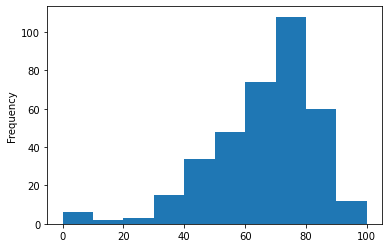

In [62]:
# That building belongs to class O4.
# What's the distribution of scores?

office = df[df['Bldg_Class'] == 'O4']
office['Energy_Score'].plot(kind = 'hist')

In [70]:
# Distribution of grades

office.groupby(['Letter_Score'])['Block'].count()

Letter_Score
A     33
B    147
C    102
D     75
F      5
Name: Block, dtype: int64

<AxesSubplot:xlabel='Sq_Footage', ylabel='Energy_Score'>

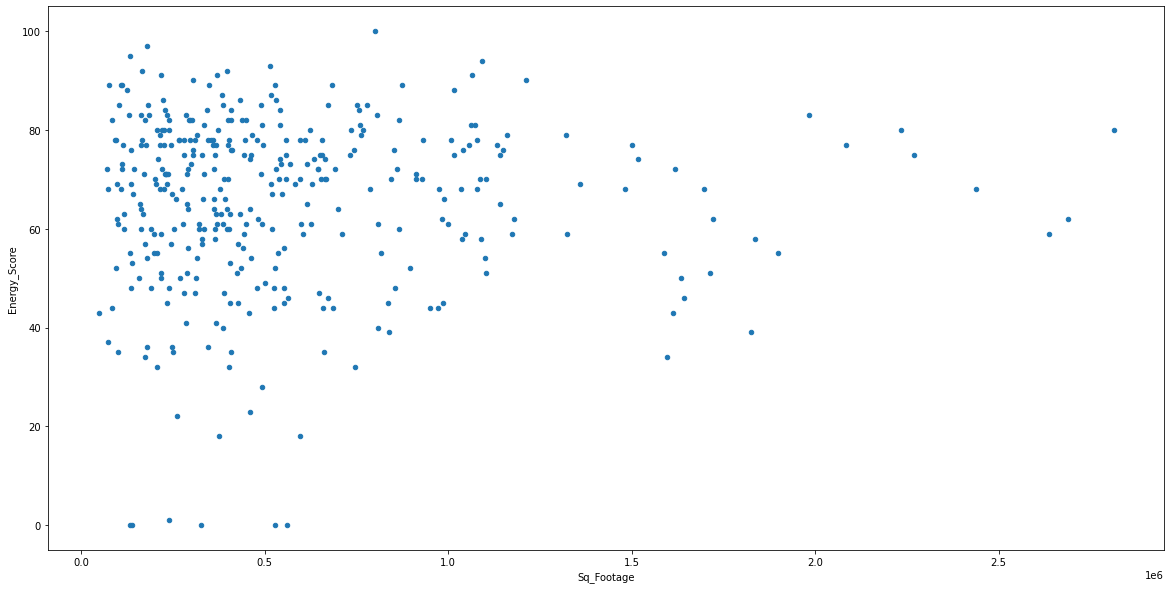

In [88]:
# Square Footage versus Energy Score

office.plot(kind = 'scatter', x = 'Sq_Footage', y = 'Energy_Score', figsize = (20, 10))

<AxesSubplot:ylabel='Frequency'>

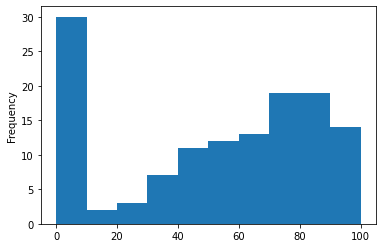

In [89]:
# The relationship certainly is not linear.
# How about smaller office buildings?

office_small = df[df['Bldg_Class'] == 'O2']
office_small['Energy_Score'].plot(kind = 'hist')

In [91]:
# Distribution of grades

office_small.groupby(['Letter_Score'])['Block'].count()

Letter_Score
A    21
B    31
C    17
D    38
F    23
Name: Block, dtype: int64

<AxesSubplot:xlabel='Sq_Footage', ylabel='Energy_Score'>

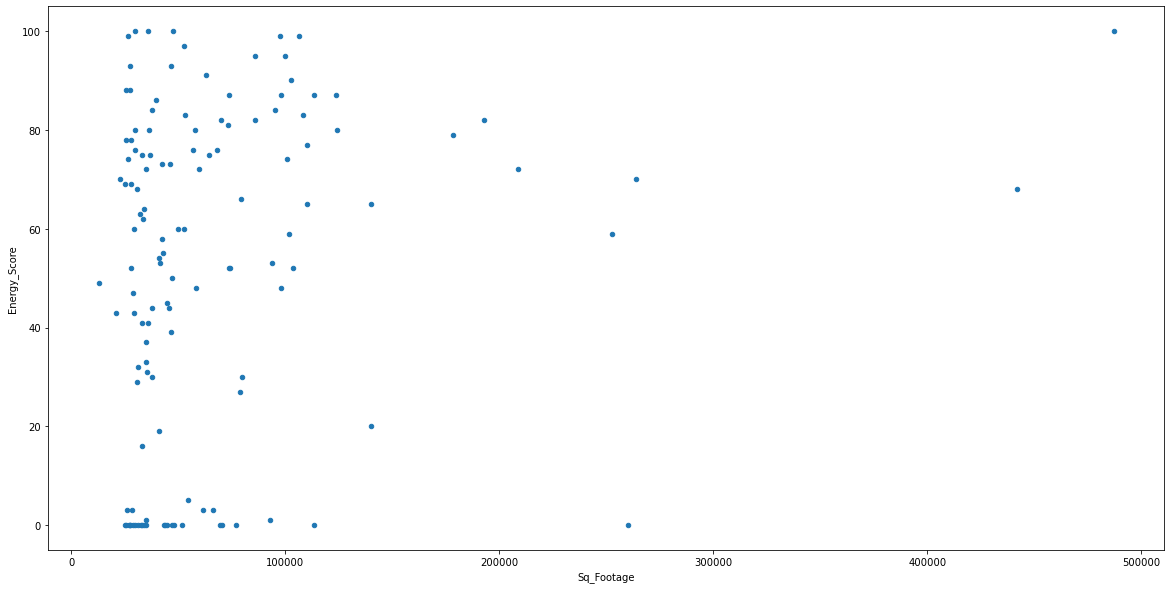

In [90]:
# Square Footage versus Energy Score

office_small.plot(kind = 'scatter', x = 'Sq_Footage', y = 'Energy_Score', figsize = (20, 10))

<AxesSubplot:ylabel='Frequency'>

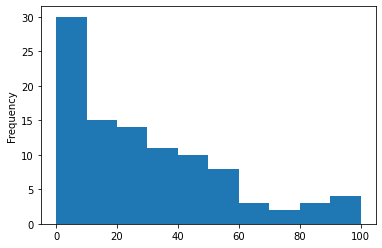

In [92]:
# Something different: hotels

hotels = df[df['Bldg_Class'] == 'H2']
hotels['Energy_Score'].plot(kind = 'hist')

In [93]:
# Distribution of grades

hotels.groupby(['Letter_Score'])['Block'].count()

Letter_Score
A     6
B     3
C     9
D    64
F    18
Name: Block, dtype: int64

<AxesSubplot:xlabel='Sq_Footage', ylabel='Energy_Score'>

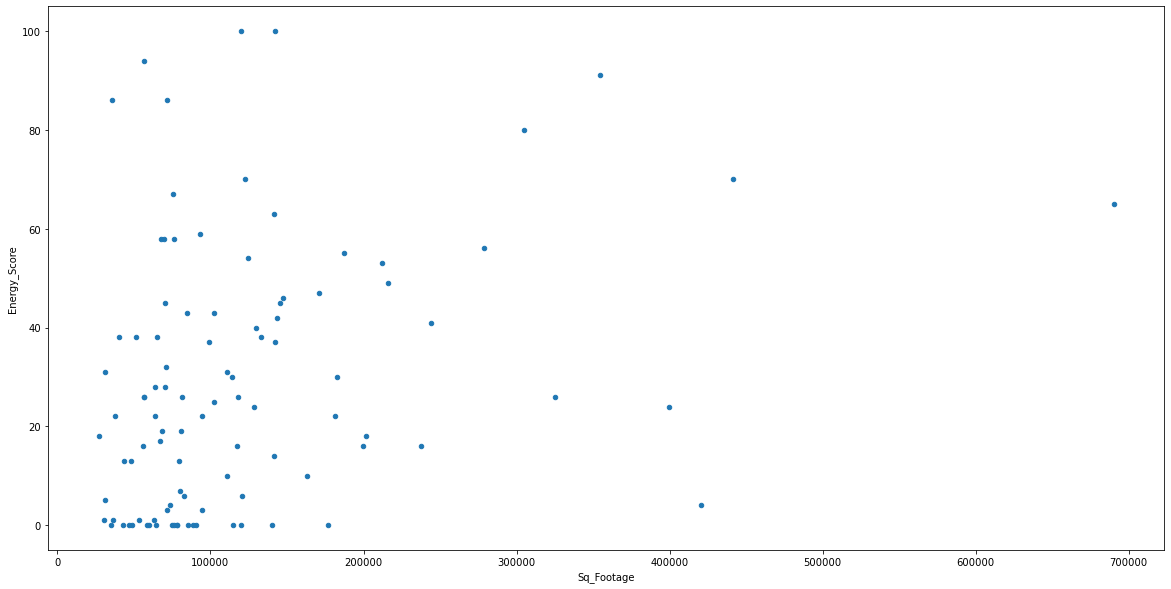

In [94]:
# Square Footage versus Energy Score

hotels.plot(kind = 'scatter', x = 'Sq_Footage', y = 'Energy_Score', figsize = (20, 10))

In [95]:
# Again, not linear.
# It's obvious that hotels score worse than office buildings.